## Map plotting examples

### Import the packages we will use

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from pymapmanager.mmMap import mmMap
from pymapmanager.mmUtil import newplotdict

### Load a map

In [29]:
filePath = 'exampleMaps/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

map rr30a loaded in 0.37 seconds.


### Plot the position of each spine along its segment tracing

mmMap.getMapValues3() took 0.22 seconds
mmMap.getMapValues3() took 0.18 seconds


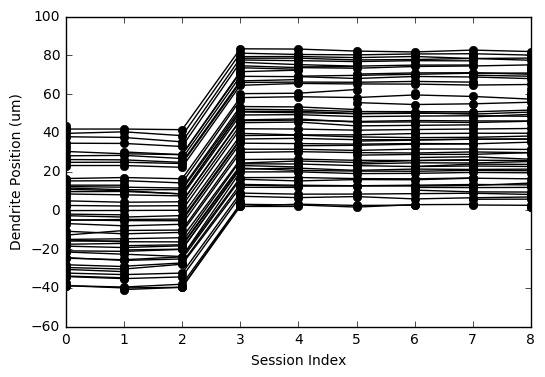

In [7]:
# getMapValues2(self, stat, roiType='spineROI', segmentID=[], plotBad=False)

segmentID = [0] # [] to plot all segment, [1,3,5] to plot segment 1, 3, and 5

# m.getMapValues2() returns a 2D numpy ndarray
# rows are object runs, columns are sessions, each [i][j] is value for 'stat'
x = m.getMapValues2('mapSession', segmentID=segmentID)
y = m.getMapValues2('pDist', segmentID=segmentID)

# plot with matplotlib
plt.plot(x, y, 'ok')
plt.plot(x.transpose(), y.transpose(), '-k')
plt.xlabel('Session Index')
plt.ylabel('Dendrite Position (um)')
plt.show()

### Plot the 'background subtracted spine sum' from image channel two.

mmMap.getMapValues3() took 0.21 seconds
mmMap.getMapValues3() took 0.18 seconds


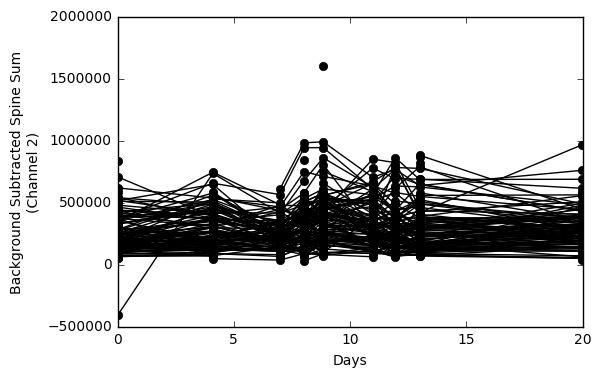

In [8]:
segmentID = [] # All segments
x = m.getMapValues2('days', segmentID=segmentID)
y = m.getMapValues2('ubssSum_int2', segmentID=segmentID)

# plot with matplotlib
plt.plot(x, y, 'ok')
plt.plot(x.transpose(), y.transpose(), '-k')
plt.xlabel('Days')
plt.ylabel('Background Subtracted Spine Sum\n(Channel 2)')
plt.show()

### Normalize to session 1 and replot.

(301, 1)


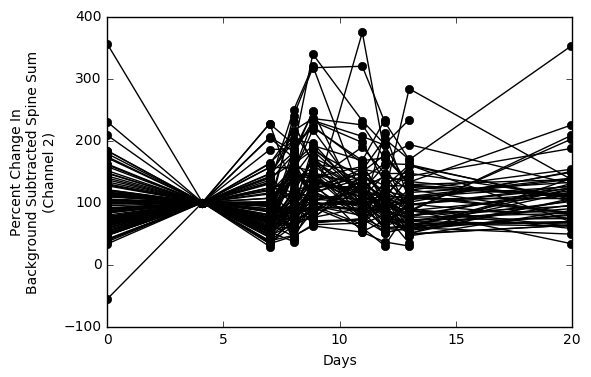

In [25]:
sessionOne = y[:,[1]]
yPercent = y / sessionOne * 100

# plot with matplotlib
plt.plot(x, yPercent, 'ok')
plt.plot(x.T, yPercent.T, '-k')
plt.xlabel('Days')
plt.ylabel('Percent Change In\nBackground Subtracted Spine Sum\n(Channel 2)')
plt.show()

### Compare a stat on two different sessions

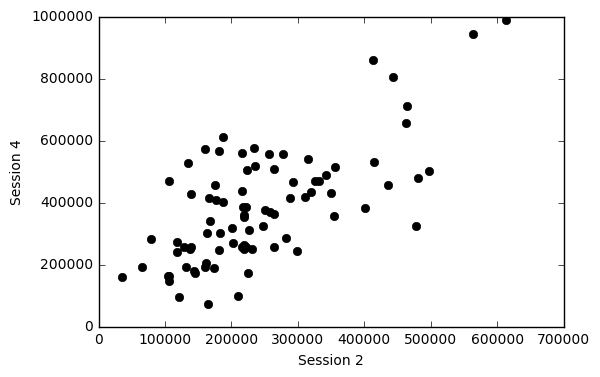

In [32]:
session4 = y[:,[4]]
session2 = y[:,[2]]

# plot with matplotlib
plt.plot(session2, session4, 'ok')
plt.xlabel('Session 2')
plt.ylabel('Session 4')
plt.show()

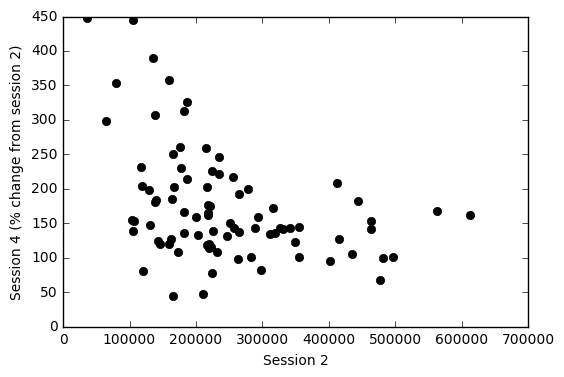

In [35]:
session4 = y[:,[4]]
session2 = y[:,[2]]

session4Norm = session4 / session2 * 100

# plot with matplotlib
plt.plot(session2, session4Norm, 'ok')
plt.xlabel('Session 2')
plt.ylabel('Session 4 (% change from session 2)')
plt.show()

### Plot length of added spines normalized to the 'birth day'.

Here we will use mmMap.getMapValues3() which takes a plot struct. Making it easier to specify paremeters to the plot.

mmMap.getMapValues3() took 0.22 seconds
mmMap.getMapValues3() took 0.2 seconds
mmMap.getMapValues3() took 0.2 seconds


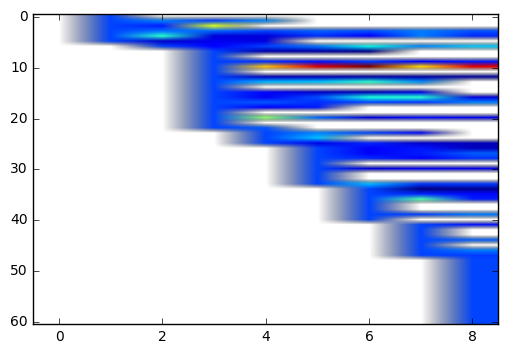

In [36]:
plotDict = newplotdict()
plotDict['xstat'] = 'mapSession'
plotDict['ystat'] = 'pDist'
plotDict['zstat'] = 'sLen3d_int1' #swap in any stat you like, e.g. 'ubssSum_int2'
plotDict['segmentid'] = [0]
plotDict = m.getMapValues3(plotDict)

plotDict2 = dict(plotDict)
plotDict2['xstat'] = 'isAdd'
plotDict2['ystat'] = 'isSub'
plotDict2['zstat'] = 'isTransient'
plotDict2 = m.getMapValues3(plotDict2)


#only plot added spines
x = m.getMapValues2('days', segmentID=plotDict['segmentid']) # get an array of values
new_z2 = []

for i, row in enumerate(plotDict['z']):
    #if np.count_nonzero(~np.isnan(row)) > 0:
    for j, val in enumerate(row):
        if plotDict2['x'][i,j] == 1:
            row = row / row[j] * 100 # z-color as '% change' from session spine was added
            #row = row - row[j] # z-color as 'absolute change' from session spine was added
            new_z2.append(row)
            break

plt.imshow(new_z2, aspect='auto')
plt.show()

### Homework
 - Plot ubssSum_int2 vs pDist, sort along pDist, calculate auto-correlation function at lag 1. Peaks in auto-correlation indicate 'hot spots' along dendritic segment. Do this for all segments in a map.
 - Plot a heat map of spine run vs session where color is ubssSum_ch2
 - plot ubssSum as a function of a spines age. X-axis should be days where day 0 is appearance of new spine. This plot will only have added spines
 - Do the same for spine 'death' where x-axis counts down to day 0 when a spine is subtracted
 

mmMap.getMapValues3() took 0.21 seconds
mmMap.getMapValues3() took 0.18 seconds


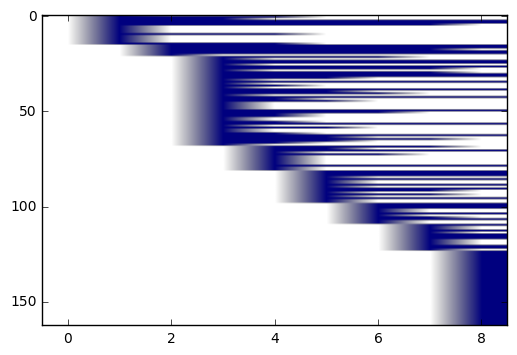

In [37]:
pd2 = newplotdict()
pd2['xstat'] = 'isAdd'
pd2['zstat'] = 'isTransient'
pd2['segmentid'] = []
pd2 = m.getMapValues3(pd2) # fetch values from the map

#only plot added spines
x = m.getMapValues2('days', segmentID=pd2['segmentid']) # get an array of values
new_z2 = []

for i, row in enumerate(pd2['z']):
    for j, val in enumerate(row):
        if pd2['x'][i,j] == 1:
            row = row - row[j] # z-color in imshow will be 'absolute change' from session spine was added
            new_z2.append(row)
            break

plt.imshow(new_z2, aspect='auto')
plt.show()